In [25]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [26]:
path = os.getcwd()
new_path = os.path.dirname(path)

in_file=new_path + '/data/' + 'ERA5_uv10m_Kaliningrad_wo29feb_daily.nc'
print(in_file)


/Users/nikolayborovets/Desktop/FALT_MIPT/FloatingUniversity/offshore_energy_calculation/data/ERA5_uv10m_Kaliningrad_wo29feb_daily.nc


In [27]:
dataset = nc.Dataset(in_file, 'r')

lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
time = dataset.variables['time'][:]
ucomp10 = dataset.variables['ucomp10'][:]
vcomp10 = dataset.variables['vcomp10'][:]

num_years = int(len(time) / 365)

num_months = 12

monthly_mean_wind_speeds = pd.DataFrame(index=range(num_years), columns=range(num_months))

for year in range(num_years):
    for month in range(num_months):
        start_index = year * 365 + month * 30
        end_index = start_index + 30
        ucomp_month = ucomp10[start_index:end_index, 3, 3]
        vcomp_month = vcomp10[start_index:end_index,3, 3]

        wind_speed_month = np.sqrt(ucomp_month**2 + vcomp_month**2).mean()

        monthly_mean_wind_speeds.iloc[year, month] = wind_speed_month


monthly_mean_wind_speeds


,0,1,2,3,4,5,6,7,8,9,10,11
0,8.228881,9.31358,8.574367,6.290752,6.203635,5.394447,7.954823,6.928785,8.018926,6.991065,9.217301,9.892287
1,8.185686,6.724658,8.912139,6.029457,5.620968,5.635786,6.341728,6.721932,7.014886,8.559317,10.234059,10.492414
2,9.496677,9.134573,7.293919,5.777346,6.18806,6.452142,6.16247,7.141534,6.368981,8.533199,10.802829,8.619132
3,8.470516,5.404412,7.866743,6.786296,5.676825,5.676747,5.80517,6.859235,7.014439,7.050637,9.35751,8.948019
4,12.213503,7.828971,7.536299,7.022244,5.923961,5.638207,6.124544,6.134071,8.192041,10.719559,10.091987,9.618998
5,10.066208,7.585881,6.473736,5.84442,6.766743,6.809784,7.019416,5.538557,8.093503,9.809982,8.268082,8.510745
6,8.702845,8.169906,7.178312,6.688259,5.938745,6.143168,6.578445,7.029225,8.660649,7.777413,9.092995,8.23276
7,9.891559,8.503456,7.232117,7.080463,6.199498,5.539557,6.139497,6.087644,9.429772,8.880992,9.654929,10.31797
8,9.235885,7.570697,7.064254,7.030685,6.590076,5.606645,6.804803,6.385262,8.303454,7.927057,7.809174,8.800304
9,8.413586,8.35381,7.053793,6.372503,5.428879,5.850443,5.594621,7.151074,8.163442,8.852352,9.342503,10.896209


In [28]:
ucomp10[0:30, 3, 3]

masked_array(data=[-12.146382  ,  -1.5010108 ,  -4.1710258 ,  -3.590001  ,
                    -1.6156739 ,   4.6378074 ,  10.11659   ,  12.733608  ,
                     5.213051  ,  12.600638  ,  -9.201754  ,   3.4323983 ,
                     2.3907938 ,   0.3345643 ,  -4.8628592 ,  -6.8545303 ,
                    -6.4045496 ,  -0.6656073 ,  -4.1893334 ,  -8.073429  ,
                    -8.323954  ,  -2.1080513 ,  -2.4934738 ,   4.8382273 ,
                     8.126845  ,  -2.0964887 ,  11.136032  ,  -6.209911  ,
                    -8.495467  ,   0.07825829],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [29]:
monthly_mean_wind_speeds.shape

(44, 12)

In [30]:
monthly_mean_wind_speeds[0].mean()

9.247369014855588

In [31]:
monthly_mean_wind_speeds.shape

(44, 12)

In [32]:
a=[]
for i in range(12):
    # print(np.round(monthly_mean_wind_speeds[i].mean(),2))
    a.append(np.round(monthly_mean_wind_speeds[i].mean(), 2))
a

[9.25, 8.54, 7.6, 6.57, 6.03, 6.12, 6.33, 6.47, 7.42, 8.29, 8.7, 9.07]

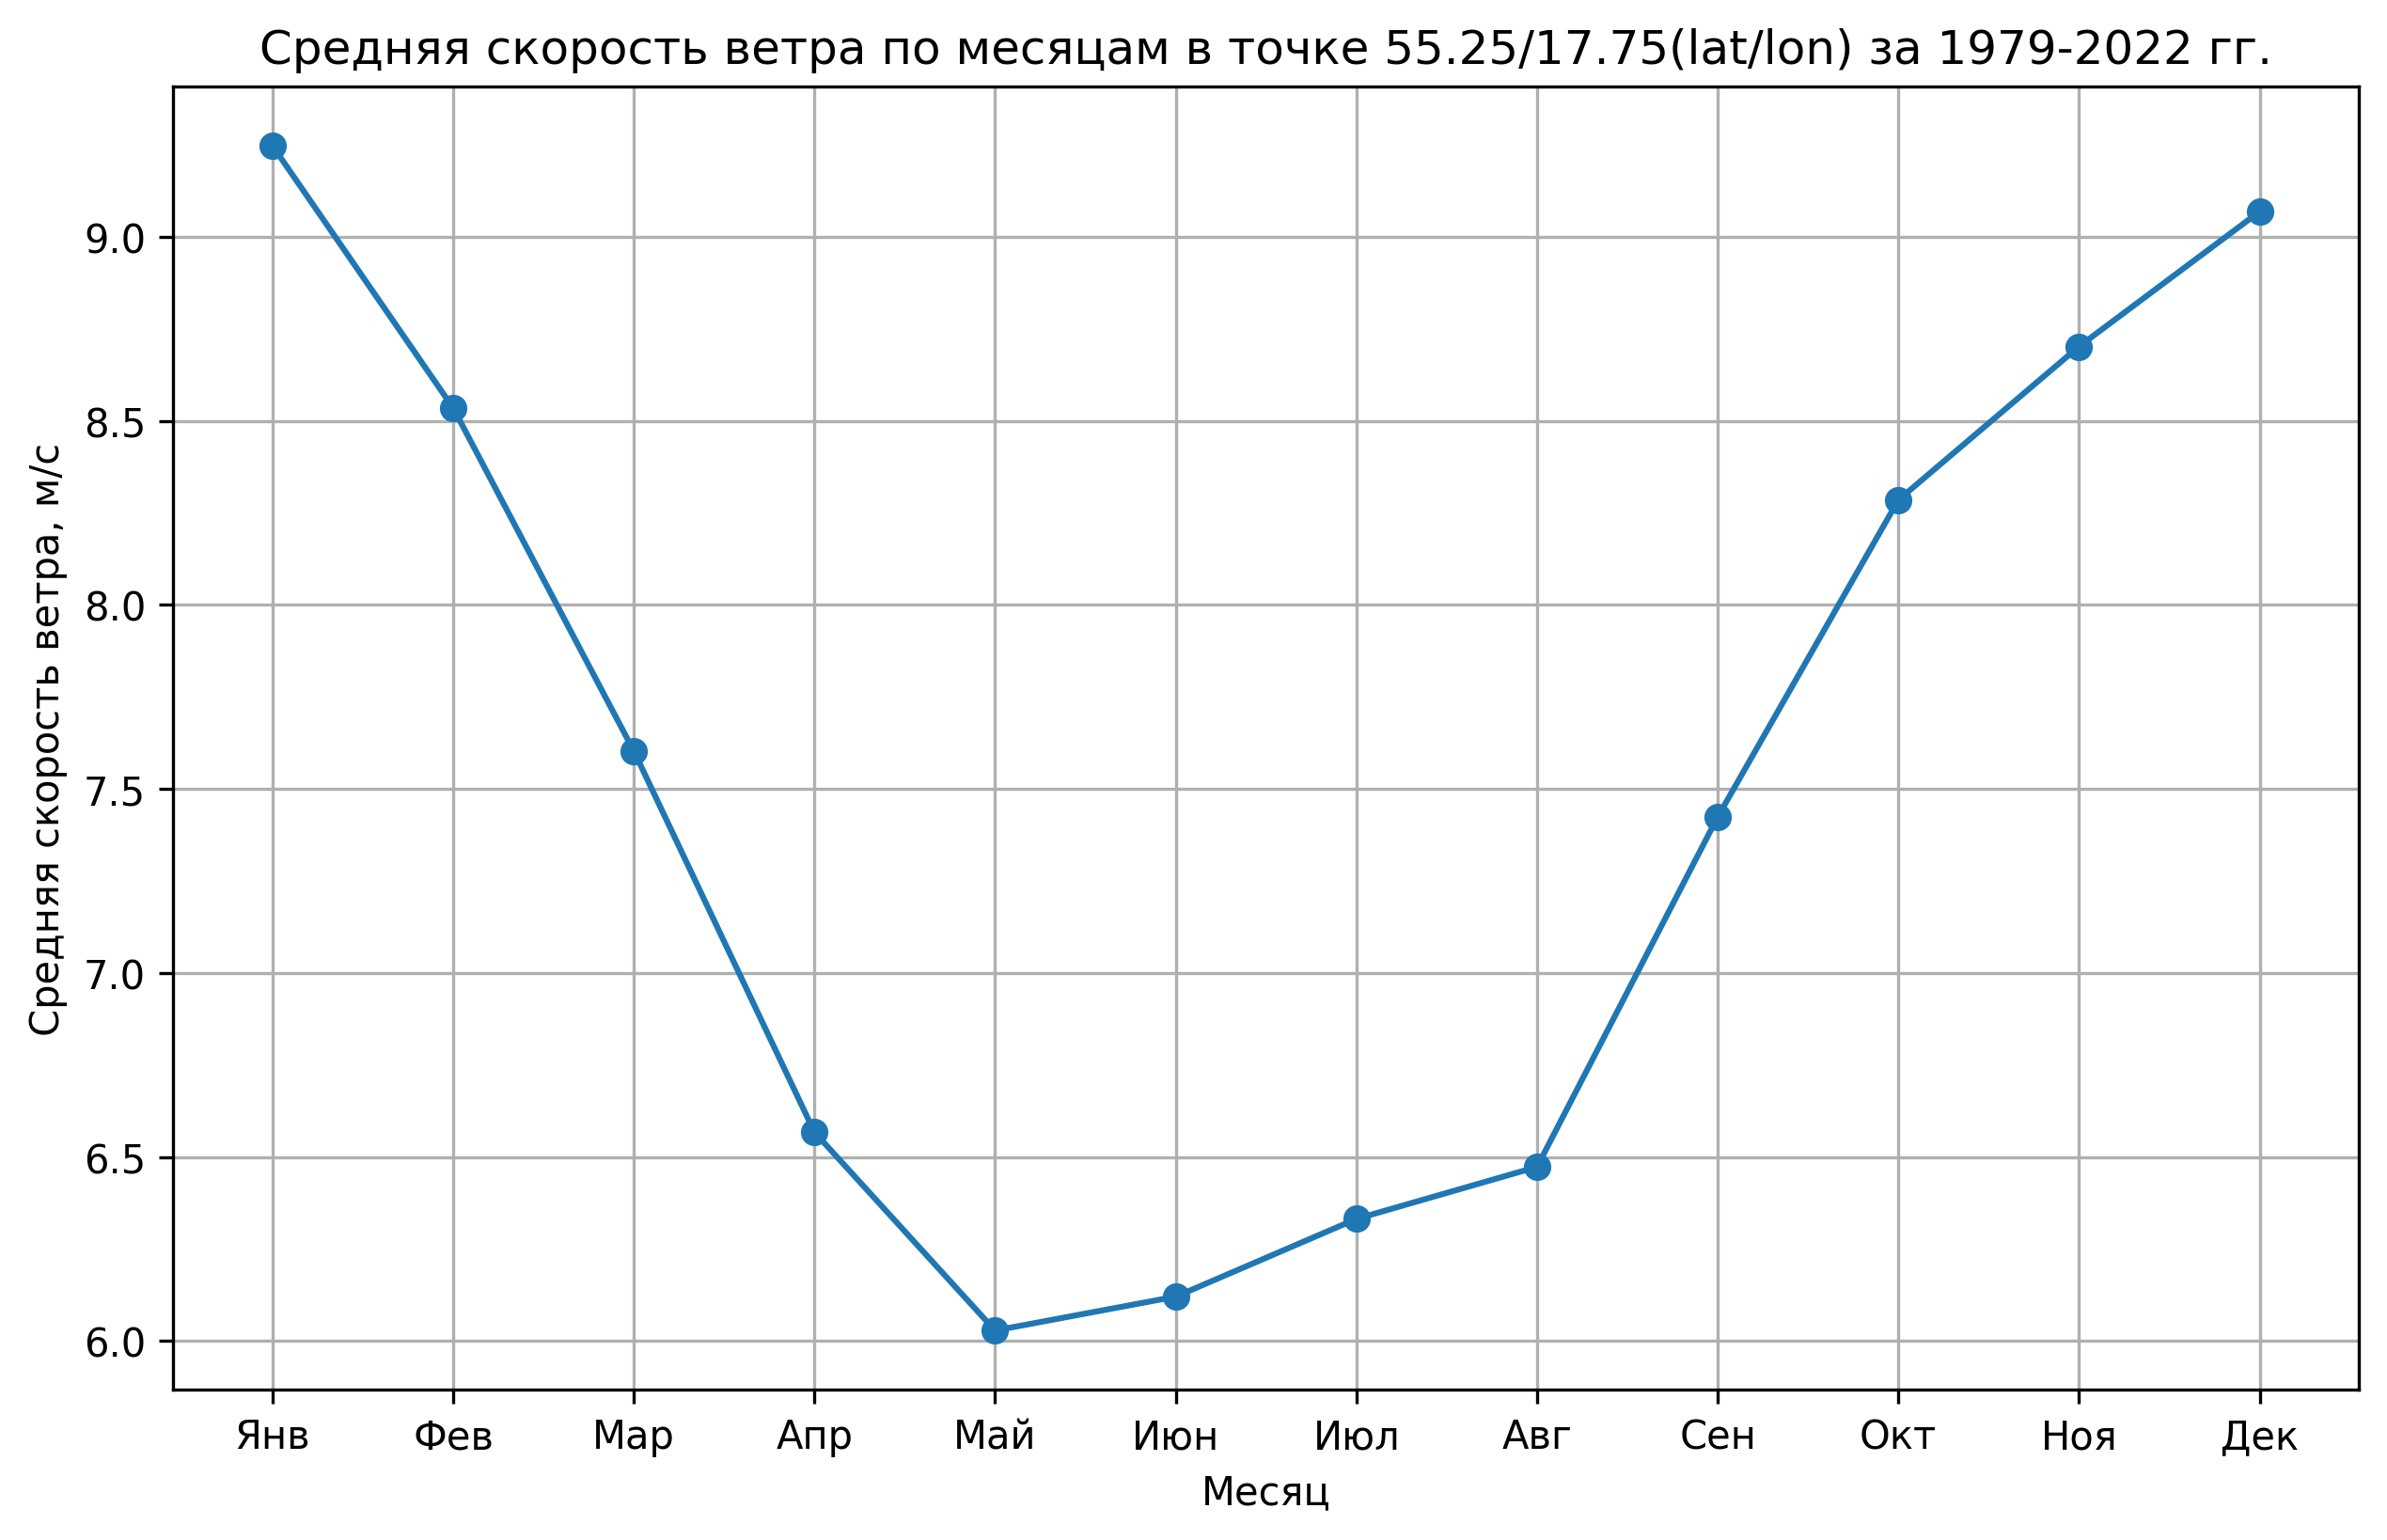

In [33]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(range(1, 13), monthly_mean_wind_speeds.mean(axis=0), marker='o', linestyle='-')
plt.xlabel('Месяц')
plt.ylabel('Средняя скорость ветра, м/с')
plt.title('Средняя скорость ветра по месяцам в точке 55.25/17.75(lat/lon) за 1979-2022 гг.')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.show()


In [34]:
min_lat = 54
max_lat = 56
min_lon = 17
max_lon = 24

# lat = 55.25
# lon = 17.75

lat_indices = np.where((lat >= min_lat) & (lat <= max_lat))[0]
lon_indices = np.where((lon >= min_lon) & (lon <= max_lon))[0]

ucomp_region = ucomp10[:, lat_indices, lon_indices]
vcomp_region = vcomp10[:, lat_indices, lon_indices]

wind_speed_region = np.sqrt(ucomp_region**2 + vcomp_region**2)

monthly_mean_wind_speeds_region = np.mean(wind_speed_region, axis=(1, 2))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), monthly_mean_wind_speeds_region, marker='o', linestyle='-')
plt.xlabel('Месяц')
plt.ylabel('Средняя скорость ветра')
plt.title('Средняя скорость ветра по месяцам в заданной области')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.show()


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (9,) (29,) 

ValueError: x and y must have same first dimension, but have shapes (12,) and (16060,)

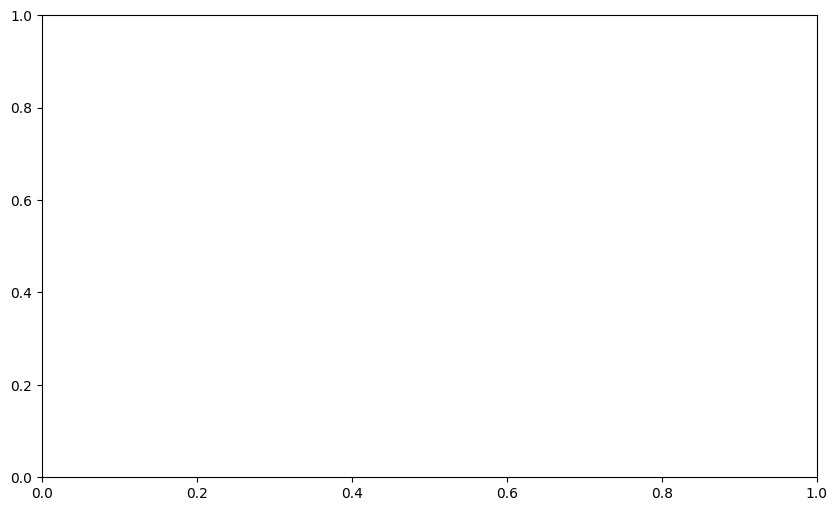

In [35]:
ucomp_region = ucomp10[:, min_lat:max_lat+1, min_lon:max_lon+1]
vcomp_region = vcomp10[:, min_lat:max_lat+1, min_lon:max_lon+1]

wind_speed_region = np.sqrt(ucomp_region**2 + vcomp_region**2)

monthly_mean_wind_speeds_region = np.mean(wind_speed_region, axis=(1, 2))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), monthly_mean_wind_speeds_region, marker='o', linestyle='-')
plt.xlabel('Месяц')
plt.ylabel('Средняя скорость ветра')
plt.title('Средняя скорость ветра по месяцам в заданной области')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.show()


In [36]:


lat_indices = np.where((lat >= min_lat) & (lat <= max_lat))[0]
lon_indices = np.where((lon >= min_lon) & (lon <= max_lon))[0]